<a href="https://colab.research.google.com/github/zeynepdicle/tflite_simple_audio/blob/main/basicModelTFlite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [3]:
%matplotlib inline

import pathlib
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

from google.colab import files

In [4]:
# Create a simple Keras model.
x = [-1, 0, 1, 2, 3, 4]
y = [-3, -1, 1, 3, 5, 7]

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(x, y, epochs=200)

Epoch 1/200
1/1 [==============================] - 1s 521ms/step - loss: 2.6191
Epoch 2/200
1/1 [==============================] - 0s 5ms/step - loss: 2.2121
Epoch 3/200
1/1 [==============================] - 0s 4ms/step - loss: 1.8889
Epoch 4/200
1/1 [==============================] - 0s 8ms/step - loss: 1.6315
Epoch 5/200
1/1 [==============================] - 0s 4ms/step - loss: 1.4260
Epoch 6/200
1/1 [==============================] - 0s 5ms/step - loss: 1.2614
Epoch 7/200
1/1 [==============================] - 0s 6ms/step - loss: 1.1290
Epoch 8/200
1/1 [==============================] - 0s 5ms/step - loss: 1.0221
Epoch 9/200
1/1 [==============================] - 0s 7ms/step - loss: 0.9352
Epoch 10/200
1/1 [==============================] - 0s 4ms/step - loss: 0.8642
Epoch 11/200
1/1 [==============================] - 0s 7ms/step - loss: 0.8056
Epoch 12/200
1/1 [==============================] - 0s 5ms/step - loss: 0.7570
Epoch 13/200
1/1 [==============================] - 0s 7ms/

In [6]:
#generate a saved model in TF format
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: saved_model/1/assets


In [7]:
#converd the model to TFlite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [8]:
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

904

In [9]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [10]:
# Test the TensorFlow Lite model on random input data.
input_shape = input_details[0]['shape']
inputs, outputs = [], []
for _ in range(100):
  input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
  interpreter.set_tensor(input_details[0]['index'], input_data)

  interpreter.invoke()
  tflite_results = interpreter.get_tensor(output_details[0]['index'])

  # Test the TensorFlow model on random input data.
  tf_results = model(tf.constant(input_data))
  output_data = np.array(tf_results)
  
  inputs.append(input_data[0][0])
  outputs.append(output_data[0][0])

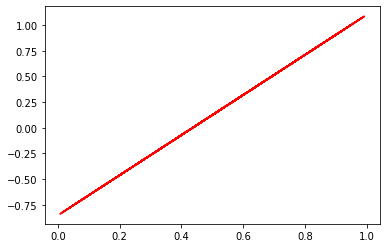

In [11]:
#Visualize the model
plt.plot(inputs, outputs, 'r')
plt.show()

In [12]:
#Download the TFLite model file
try:
  from google.colab import files
  files.download(tflite_model_file)
except:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>